In [284]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [285]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = 100
 
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [15,8]

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [286]:
df=pd.read_csv('data1.csv')

In [287]:
df.head(2)

,Unnamed: 0,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,Churn,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335,Yes,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,High,Suburban,Professional,No
1,1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763,Yes,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes


In [288]:
df=df.drop(columns=['Unnamed: 0'])

In [289]:
df.shape

(50679, 53)

### Split the dependent and independent variables

In [290]:
# store the target variable 'Loan Status' in a dataframe 'df_target'
df_target = df['Churn']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Loan Status' using drop()
# 'axis = 1' drops the specified column
df_features = df.drop('Churn', axis = 1)

In [291]:
df_target.value_counts()

No     36176
Yes    14503
Name: Churn, dtype: int64

In [292]:
dict_1={'Yes':1,'No':0}

In [293]:
df_target=df_target.map(dict_1)

In [294]:
df_target.value_counts()

0    36176
1    14503
Name: Churn, dtype: int64

### Filetring numerical and categorical columns.

In [295]:
num_cols=df.select_dtypes(include=np.number)

In [296]:
num_cols.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565


In [297]:
cat_cols=df_features.select_dtypes(include='object')

In [298]:
cat_cols.head(3)

,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,New_maritalstatus
0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,Yes,High,Suburban,Professional,No
1,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,Medium,Suburban,Professional,Yes
2,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Medium,Town,Crafts,Yes


### Encoding the categorical column

In [299]:
# since credit rating ordinal we encode with ordinal encoding.

In [300]:
cat_cols.shape

(50679, 19)

In [301]:
dict_2={'Low':1,'Medium':2,'High':3}

In [302]:
df['CreditRating']=df['CreditRating'].map(dict_2)

### one hot encoding for the other categories.

In [303]:
new_cat=cat_cols.drop(columns=['CreditRating'])

In [304]:
df_cat=pd.get_dummies(new_cat,drop_first=True)

In [305]:
df_cat.shape

(50679, 26)

In [306]:
df_cat.head()

,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes
0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [307]:
df_cat['CreditRating']=df['CreditRating']

### concatinate numerical and categorical data.

In [308]:
df1=pd.concat([num_cols,df_cat],axis=1)

In [309]:
df1.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Age,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,New_maritalstatus_Yes,CreditRating
0,-0.783843,-0.580074,-1.045645,-0.289834,-0.414232,-0.125819,-0.564829,-0.449982,-0.588732,-0.310138,-0.567148,-0.367182,-0.256169,-0.107761,-0.723013,-0.491577,-0.312753,-0.472485,-0.570786,-0.020737,-0.276289,4.339230,0.382345,-0.523532,0.146580,0.487141,-0.072301,4.784978,-0.127989,-0.169323,-0.103552,-0.140245,1.587335,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,3
1,-0.941334,-0.974398,-1.255508,-0.401835,-0.414232,-0.125819,0.029311,0.030120,-0.632953,-0.373953,-0.659648,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.817997,-0.720326,-0.635004,-0.020737,-0.329856,4.031488,-0.433489,-0.523532,0.146580,-0.616471,4.462720,-0.175702,-0.127989,-0.169323,0.215218,-0.140245,-0.144763,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,2
2,-0.469311,-0.978171,-0.374082,-0.401835,-0.414232,-0.125819,0.037078,0.030120,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.688671,-0.714491,-0.491577,-0.853269,-0.691232,-0.654269,-0.020737,-0.329856,4.236649,-0.433489,-0.523532,-0.604989,-0.616471,5.684756,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.381975,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,2
3,0.525509,1.482105,1.178906,0.153688,-0.414232,-0.125819,0.654518,0.234795,5.082715,0.328017,1.223762,0.474745,0.855308,0.510956,9.795865,8.311225,4.431774,2.541478,3.179537,-0.020737,3.723433,4.134069,0.382345,0.956226,5.407560,2.694365,0.312561,-0.175702,-0.127989,-0.169323,0.533989,-0.140245,-1.052052,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2
4,-0.937964,-0.993265,-1.255508,-0.401835,-0.414232,-0.125819,0.044845,0.025067,-0.666120,-0.373953,-0.729024,-0.367182,-0.256169,-0.691072,-0.723013,-0.491577,-0.865662,-0.731102,-0.654269,-0.020737,-0.329856,3.518585,0.382345,0.956226,1.649717,1.590753,1.875814,-0.175702,-0.127989,-0.169323,1.490301,2.476643,0.597565,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3


## Train Test Split

In [310]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test ,y_train ,y_test = train_test_split(df1,df_target, random_state=0, test_size=0.30)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)

# print dimension of test set
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

x_train:  (35475, 60)
y_train:  (35475,)
x_test:  (15204, 60)
y_test:  (15204,)


#### Build a full decision tree model on a train dataset using 'entropy'.

In [311]:
from sklearn.tree import DecisionTreeClassifier

In [312]:
decision_tree_classification = DecisionTreeClassifier(criterion ='gini',random_state = 10)

In [313]:
decision_tree=decision_tree_classification.fit(x_train,y_train)

**Calculate performance measures on the train set.**

In [314]:
train_pred = decision_tree.predict(x_train)

In [315]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25403
           1       1.00      1.00      1.00     10072

    accuracy                           1.00     35475
   macro avg       1.00      1.00      1.00     35475
weighted avg       1.00      1.00      1.00     35475



observation :
* we can see model is 100% accurate on train data.

**Calculate performance measures on the test set.**

In [316]:
test_pred=decision_tree.predict(x_test)

In [317]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10773
           1       0.35      0.37      0.36      4431

    accuracy                           0.62     15204
   macro avg       0.54      0.55      0.54     15204
weighted avg       0.62      0.62      0.62     15204



Observation:-
* We can observe that train accuracy is 100% and test accuracy is 0.62% this means model is overfitted.


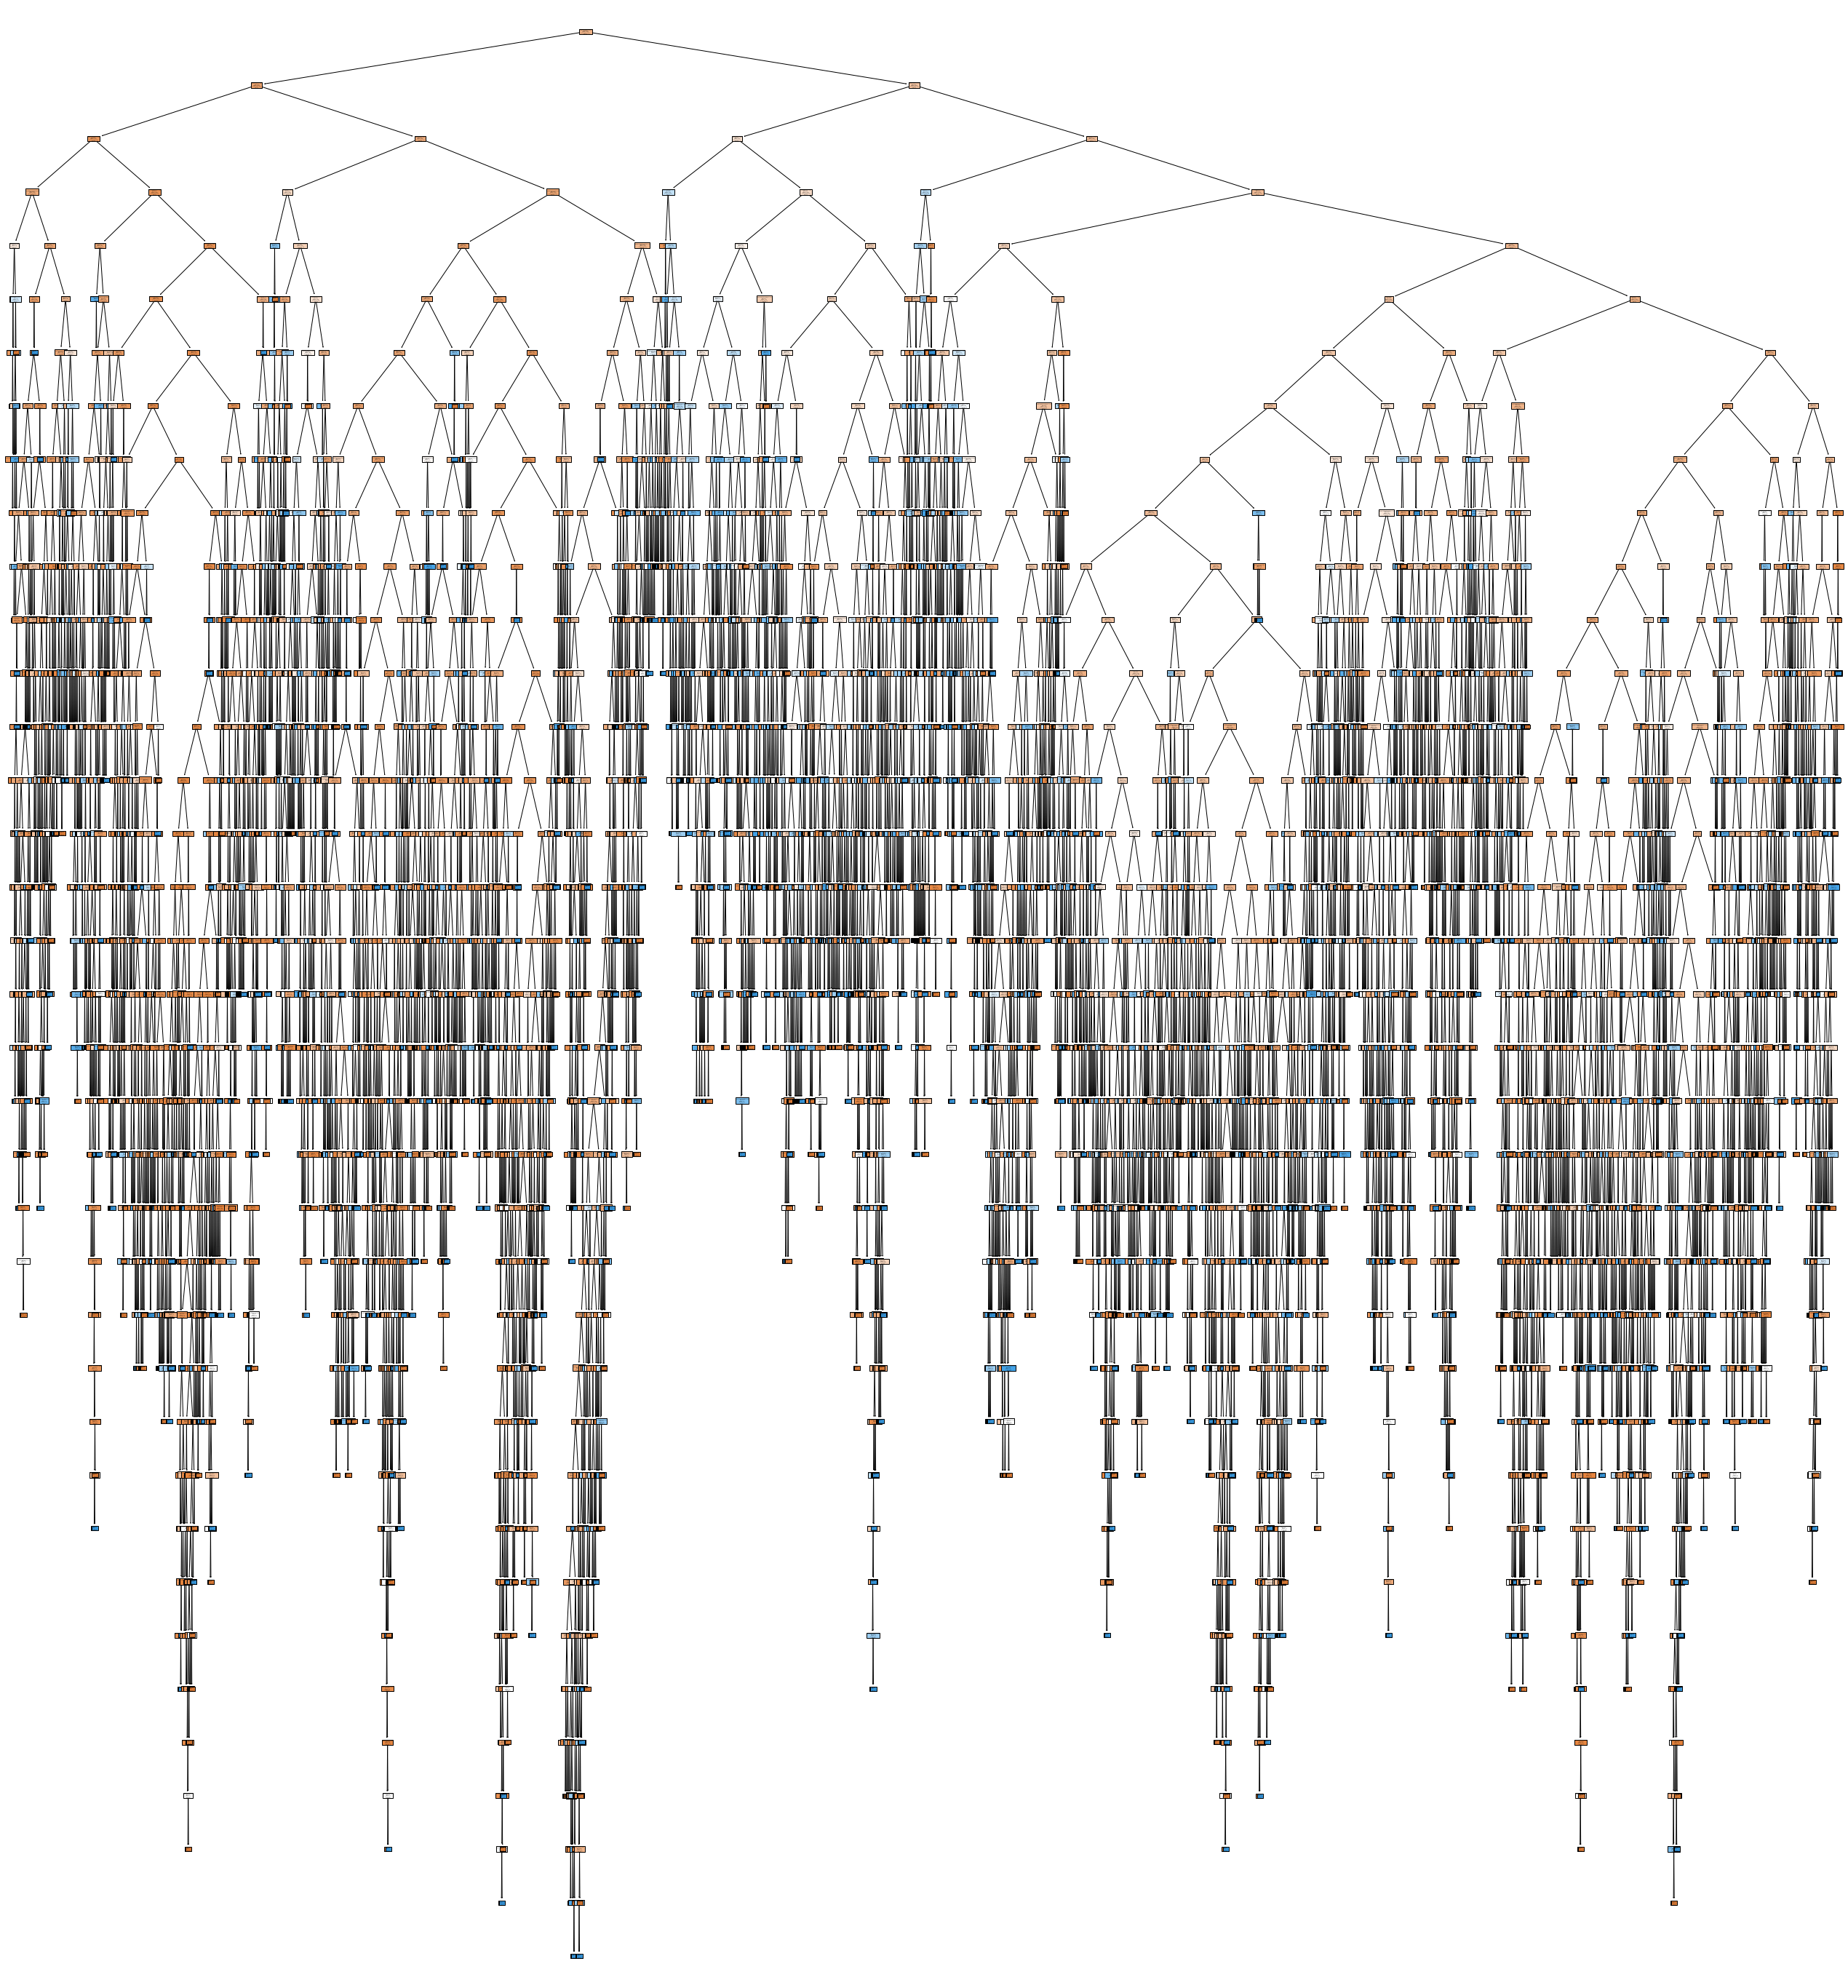

In [318]:
# No is mapped to 0
fig = plt.figure(figsize=(45,50))
_ = tree.plot_tree(decision_tree,
                   feature_names=x_train.columns,  
                   class_names=["0","1"],
                   filled=True)

### confusion matrix

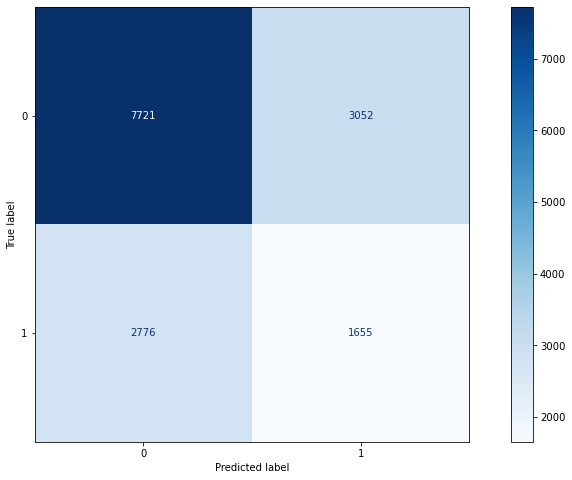

In [320]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,test_pred,cmap='Blues')

## Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [331]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion'
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(10, 20),
                     'max_features': ["sqrt", "log2"],
                    }]

In [333]:
kf=KFold(n_splits=5,shuffle=True, random_state=0)

In [334]:
DT=DecisionTreeClassifier(random_state=0)

In [335]:
gr_model=GridSearchCV(estimator=DT,
    param_grid=tuned_paramaters,cv=kf)

In [336]:
tree_grid_model=gr_model.fit(x_train,y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'} 



In [337]:
final_model=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt',random_state=10)

In [339]:
dt_model=final_model.fit(x_train,y_train)

### performance measures on train model

In [340]:
y_pred=dt_model.predict(x_train)

In [341]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.97      0.84     25403
           1       0.67      0.14      0.23     10072

    accuracy                           0.74     35475
   macro avg       0.71      0.56      0.53     35475
weighted avg       0.72      0.74      0.67     35475



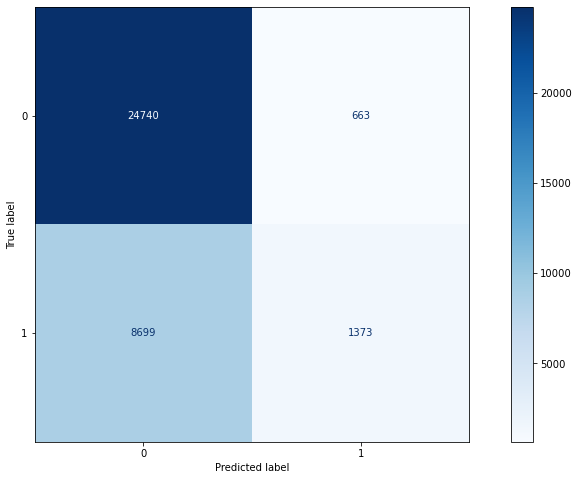

In [342]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train,y_pred,cmap='Blues')

### performance measures on test model

In [343]:
y_test_pred=dt_model.predict(x_test)

In [344]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.96      0.82     10773
           1       0.47      0.10      0.16      4431

    accuracy                           0.70     15204
   macro avg       0.59      0.53      0.49     15204
weighted avg       0.65      0.70      0.63     15204



In [346]:
print('roc_auc_score',roc_auc_score(y_train,y_pred))

roc_auc_score 0.5551096135693729
